# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as sstats
import statsmodels.api as sm
import statsmodels.stats.weightstats as smsw

# 1. Is the distribution of body temperatures normal?

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


As a first approach, we can simply plot the histogram of the data and compare to the normal distribution derived using the sample mean and standard deviation, thus:

In [5]:
all_mean = np.mean(df.temperature)
all_sd = np.std(df.temperature) #population sd

In [6]:
from statistics import pstdev, stdev
pop_sd = pstdev(df.temperature)
samp_sd = stdev(df.temperature)

In [7]:
all_sd, pop_sd, samp_sd

(0.7303577789050377, 0.730357778905038, 0.7331831580389456)

In [8]:
# standard error is sample sd / sqrt(N) for N draws!
np.sqrt(np.sum((df.temperature-all_mean)**2)/129)

0.7331831580389456

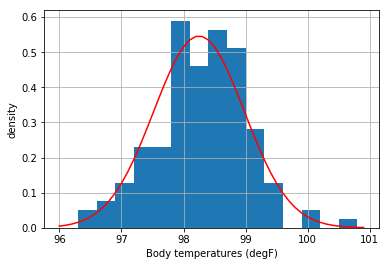

In [9]:
df.temperature.hist(bins = 15, density = True)
x = np.arange(96, 101, 0.1)
y = norm.pdf(x, all_mean, all_sd)
_ = plt.plot(x, y, 'red')
_ = plt.xlabel('Body temperatures (degF)')
_ = plt.ylabel('density')

Although the histogram looks a little lumpy, it's potentially a reasonable fit with the normal distribution. It may be that if we acquired more data the gaps would fill in.

## ECDF

We can also view the ECDF of the distribution(s) as introduced in the DataCamp tutorial.

In [10]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

In [11]:
x_temp_sample, y_temp_sample = ecdf(df.temperature.values)

In [12]:
all_temp_theoretical = np.random.normal(all_mean, all_sd, 1000)
x_all_theor, y_all_theor = ecdf(all_temp_theoretical)

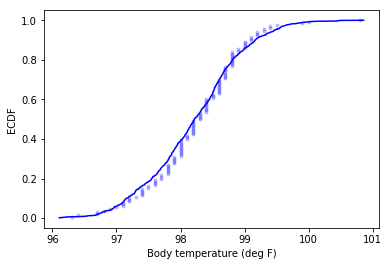

In [13]:
_ = plt.plot(x_temp_sample, y_temp_sample, color = 'blue', linestyle = 'none', marker = '.', alpha = 0.2)
_ = plt.plot(x_all_theor, y_all_theor, color = 'blue', linestyle = '-')
_ = plt.xlabel('Body temperature (deg F)')
_ = plt.ylabel('ECDF')

This actually shows the data do look quite normal. There's some deviation above 99 degrees F.

Another way is we can look at a QQ plot - the expected quantiles versus the sample quantiles. We do this below with the standardized line added for reference. There is again a pretty good agreement. The values do, indeed, seem to be normally distributed. 

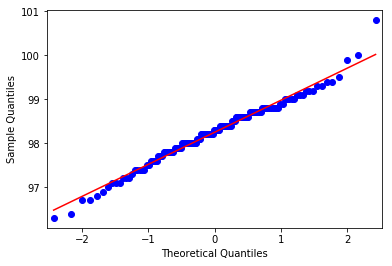

In [14]:
_ = sm.qqplot(df.temperature.values, line='s')
#plt.show()

# 2. Is the sample size large? Are the observations independent?

In [15]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [16]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

There are 130 samples, which is a reasonable size. We might reasonably assume the observations are independent, although the nature of how they were gathered is not specified. It is reasonable to assume that measuring one person's temperature does not affect the next temperature, although knowing that the original measurements took some time because of the thermometer technology and that a person's temperature varies throughout the day we might wisely consider a potential source of lack of independence arising from some people being measured at the same time of day. Without knowing anything further about the original data, we can safely take 130 to be much less than 10% of the population size. However, I believe the original dataset was much larger, a couple of thousand or thereabouts from memory. On one hand, this would still be much less than 10% of the population. On the other hand, this may turn out to be a significant fraction of the local population. We don't know from what general population either this current 130 sample size was taken or the original sample size was taken. But independence seems reasonable.

# 3. Is the true population mean really 98.6 degrees F? 

## Bootstrap hypothesis test

In [17]:
np.random.seed(42)
# bootstrap replicate function
def bs_replicate_1d(data, func, **kwargs):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample, **kwargs)

N_rep = 10000
bs_replicates = np.empty(N_rep)
for i in np.arange(N_rep):
    bs_replicates[i] = bs_replicate_1d(df.temperature.values, np.mean)

# Does the 95% CI of the bootstrap replicates contain 98.6?    
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[98.12461538 98.37384615]


The confidence interval does not contain 98.6, therefore we reject the null hypothesis that the mean is 98.6.

## Frequentist hypothesis test

This will be a one-sample test as we are testing a sample against a single value. Note, this section is not actually covered in the curriculum as it currently stands!

### t or z statistic?

The sample size of 130 and reasonable symmetry of the distribution tells us we can comfortably use a z-statistic.

To be clear here, the null hypothesis is that the mean temperature is 98.6, and we want to perform a two-sided test.

#### z-test

In [18]:
# calculate the z-statistic and the p-value
smsw.ztest(df.temperature.values, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Note, we can calculate the z-statistic manually thus
$z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{N-1}}}$, where $\bar{x}$ is the sample mean, $s$ the sample standard deviation, $\mu$ the mean (under the null hypothesis), and $N$ the sample size.

In [19]:
z = (all_mean - 98.6)/(all_sd/np.sqrt(129))
print(z)

-5.454823292364079


Testing the null hypothesis now means calculating the probability of getting a value "at least as extreme" as this if the null hypothesis were true. This is a two-sided test and so we are interested in calculating the probability of getting a value less than -5.45 and greater than 5.45. Due to the symmetry of the normal distribution, we can calculate one and multiple by two.

In [20]:
p_z = 2 * sstats.norm.cdf(z)
print(p_z)

4.90215701411338e-08


This p-value is extremely small. It is unlikely to have occurred by chance if the null hypothesis were true and so we reject the null hypothesis.

#### t-test

In [21]:
# calculate the t-statistic and the p-value
sstats.ttest_1samp(df.temperature.values, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [22]:
p_t = 2 * sstats.t.cdf(z, df=129)
print(p_t)

2.4106320415609943e-07


This p-value is also extremely small but, noticeably, somewhat larger than the p-value under the z-test. This reflects the fact that the t-distribution is wider than the normal; there is a higher probability of seeing more extreme values.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [23]:
np.random.seed(100)
subsamp_10 = np.random.choice(df.temperature.values, 10, replace = False)

In [24]:
# calculate the z-statistic and the p-value
smsw.ztest(subsamp_10, value=98.6)

(-3.1957418477478403, 0.0013947183948314953)

In [25]:
# calculate the t-statistic and the p-value
sstats.ttest_1samp(subsamp_10, 98.6)

Ttest_1sampResult(statistic=-3.1957418477478403, pvalue=0.010905578505191494)

Although the p-value from the t-test is still "significant" at the 95% level, we can easily see how it is approaching being insufficiently significant to reject the null hypothesis. This does not make the t-test wrong, far from it. The t-test is intended for small sample sizes where more extreme values are more likely just by random chance. If the p-value were a little larger we would certainly fail to reject the null hypothesis. Again, this does not make it wrong. It reflects our increased uncertainty, or lack of confidence, in our test statistic due to the small sample size. We would be more likely to (wisely) say our sample does not provide sufficient evidence to reject the null hypothesis.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

We have a single sample (of size 130). What might different samples look like? This is, perhaps, reminiscent of the Sheffield rainfall data bootstrap example from DataCamp. Let's pinch that code to visualize 50 bootstrap samples with an ECDF:

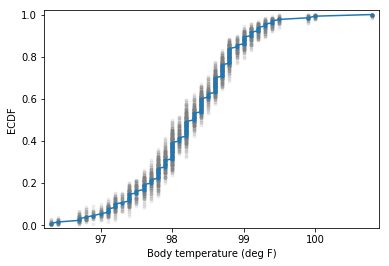

In [26]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df.temperature.values, size=len(df.temperature.values))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(df.temperature.values)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Body temperature (deg F)')
_ = plt.ylabel('ECDF')


## Bootstrap approach

We'll define abnormal as something more extreme than 99% of the population. The question then is "what is that acceptable/normal range?"

What does this mean? Well if we had enough data we could just calculate the .5 and 99.5 percentiles empirically by finding the value below which are .5% of the samples and the value above which are .5% of the samples. But we have just the one. We can perform 10,000 bootstrap experiments and calculate the required percentiles for each and then find the expected value for the percentiles (the mean).

In [27]:
N_rep=10000
bs_replicates = np.empty([N_rep, 2])
for i in np.arange(N_rep):
    bs_replicates[i, :] = bs_replicate_1d(df.temperature.values, np.percentile, q=[0.5, 99.5])

In [28]:
bs_replicates.mean(axis=0)

array([ 96.4631234, 100.2181207])

## Frequentist method

In [29]:
# critical value = 2.579 for z statistic for 99% CI
# multiply by sample standard deviation (se for 1 draw)
# 99% CI:
all_mean - 2.579 * samp_sd, all_mean + 2.579 * samp_sd

(96.35835140464833, 100.14011013381322)

## Abnormal temperature

The bootstrap approach suggests an abnormal temperature would be below 96.46 or above 100.22, and the frequentist approach suggests 96.36 and 100.14, respectively.

# 6. Is there a significant difference between males and females in normal temperature?

In [30]:
temp_males = df['temperature'][df['gender'] == 'M'].values
temp_females = df['temperature'][df['gender'] == 'F'].values

## EDA

The first step should be to perform some EDA. What do the separate distributions look like? We can use our ECDF defined above to compare them.

In [31]:
male_temp_val, male_temp_ind = ecdf(temp_males)
female_temp_val, female_temp_ind = ecdf(temp_females)

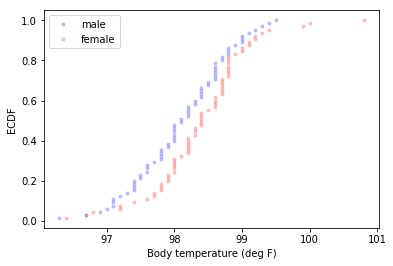

In [32]:
_ = plt.plot(male_temp_val, male_temp_ind, color = 'blue', linestyle = 'none', marker = '.', alpha = 0.2)
_ = plt.plot(female_temp_val, female_temp_ind, color = 'red', linestyle = 'none', marker = '.', alpha = 0.2)
_ = plt.xlabel('Body temperature (deg F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['male', 'female'], loc='upper left')

It certainly does appear that the male and female temperature distributions are quite different.

## Bootstrap approach

Recall from the DataCamp unit on bootstrap hypothesis testing, we:

1. Clearly state the null hypothesis
2. Define our test statistic
3. Generate many sets of simulated data assuming the null hypothesis is true
4. Compute the test statistic for each simulated data set
5. Calculate the p-value as the fraction of the simulate data sets for which the test statistic is at least as extreme as for the real data.

So our null hypothesis is that there is no difference between the normal body temperature for males and females. Our test statistic will be the difference in the two means.

This is a two-sample test just like the test about the two frogs, A and B. Actually I have an objection to the DataCamp exercise. The stated question was whether the means of the frogs' forces were different, but the test was a one-sided test!

In [33]:
male_temp_shifted = temp_males - np.mean(temp_males) + all_mean
female_temp_shifted = temp_females - np.mean(temp_females) + all_mean

In [34]:
# write a function to generate the replicates
def draw_bs_reps(data, func, size=1):
    return np.array([bs_replicate_1d(data, func) for _ in range(size)])

In [35]:
np.random.seed(100)
bs_replicates_male = draw_bs_reps(male_temp_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_temp_shifted, np.mean, 10000)

In [36]:
bs_replicates_diff = bs_replicates_male - bs_replicates_female
empirical_mean_diff = np.mean(temp_males) - np.mean(temp_females)
print(empirical_mean_diff)

-0.2892307692307696


So, empirically, we have a difference of (minus) 0.289 between the sample means of the males and females. Now, we have to be careful here. We "know" from our EDA above, that females seemed to have a higher body temperature than males. It seems natural to be testing that as the alternative hypothesis. In other words, we might go ahead and calculate the bootstrap probability of getting a value for the female mean at least 2.89 higher than the male mean. However, this is not what the question asks. We have no prior reason to be thinking that it might be females with the higher temperature. We simply want to know whether males and females have _different_ temperatures.

We can illustrate this by considering the histogram of the bootstrapped replicates of differences between the means, as shown below. The means of the bootstrapped sample differences is, as expected, centred around zero because we shifted both samples to have the same mean. If we were truly only interested in the how often females had a higher temperature than males, we would calculate the proportion of the distribution to the left of the solid red line. But our task is to consider whether the body temperatures of males and females is _different_. We have observed a difference of 0.289. We want to calculate how often we see a difference of 0.289. We also see differences of at least 0.289 to the right hand side of the distribution of differences, where males have higher temperatures than females. In other words, we also want to include that region of the distribution. By adding both tails together we can calculate the bootstrapped probability of seeing at least a difference of 0.289 between the male and female means.

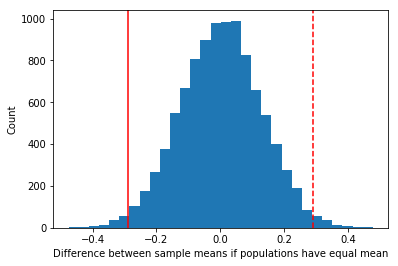

In [37]:
_ = plt.hist(bs_replicates_diff, bins=30)
_ = plt.xlabel('Difference between sample means if populations have equal mean')
_ = plt.ylabel('Count')
_ = plt.axvline(x=empirical_mean_diff, color='red')
_ = plt.axvline(x=-empirical_mean_diff, color='red', linestyle='--')

In [38]:
pvalue = np.sum(np.abs(bs_replicates_diff) >= np.abs(empirical_mean_diff)) / len(bs_replicates_diff)
print(pvalue)

0.0229


## Frequentist approach - t-test

Perform t-test on the two independent populations of male and female. Assume equal variance. Take 5% as the significance level.

In [39]:
sstats.ttest_ind(temp_males, temp_females)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

## Conclusion

We conclude that there is a significant difference between male and female body temperatures (at the 5% significance level). Both the bootstrap and frequentist methods give a p-value of around 2.3 to 2.4%. For such a p-value, however, we would be wise to do further research before contemplating publishing a new scientific finding.